In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from scipy.optimize import curve_fit

In [2]:
pH_low = 2.0
pH_high = 11.0
pH_step = 0.5
pH_list = np.arange(pH_low, pH_high, pH_step)
nsteps = (pH_high - pH_low)/pH_step
l_list = [None]*int(nsteps)
for pH in pH_list:
    l_list[int(np.where(pH == pH_list)[0][0])] = pandas.read_csv('lambda_list-'+str(pH)+'.csv', index_col = 0)

In [3]:
occup = {}
for index, row in l_list[0].iterrows():
    occup[index] = []
for pH in range(pH_list.shape[0]):
    for index, row in l_list[pH].iterrows():
        occup[index].append(l_list[pH].loc[index, :].mean())  

In [4]:
def hill_func(pH, n, pKa):
    return 1/(1+10**(n*(pH-pKa)))

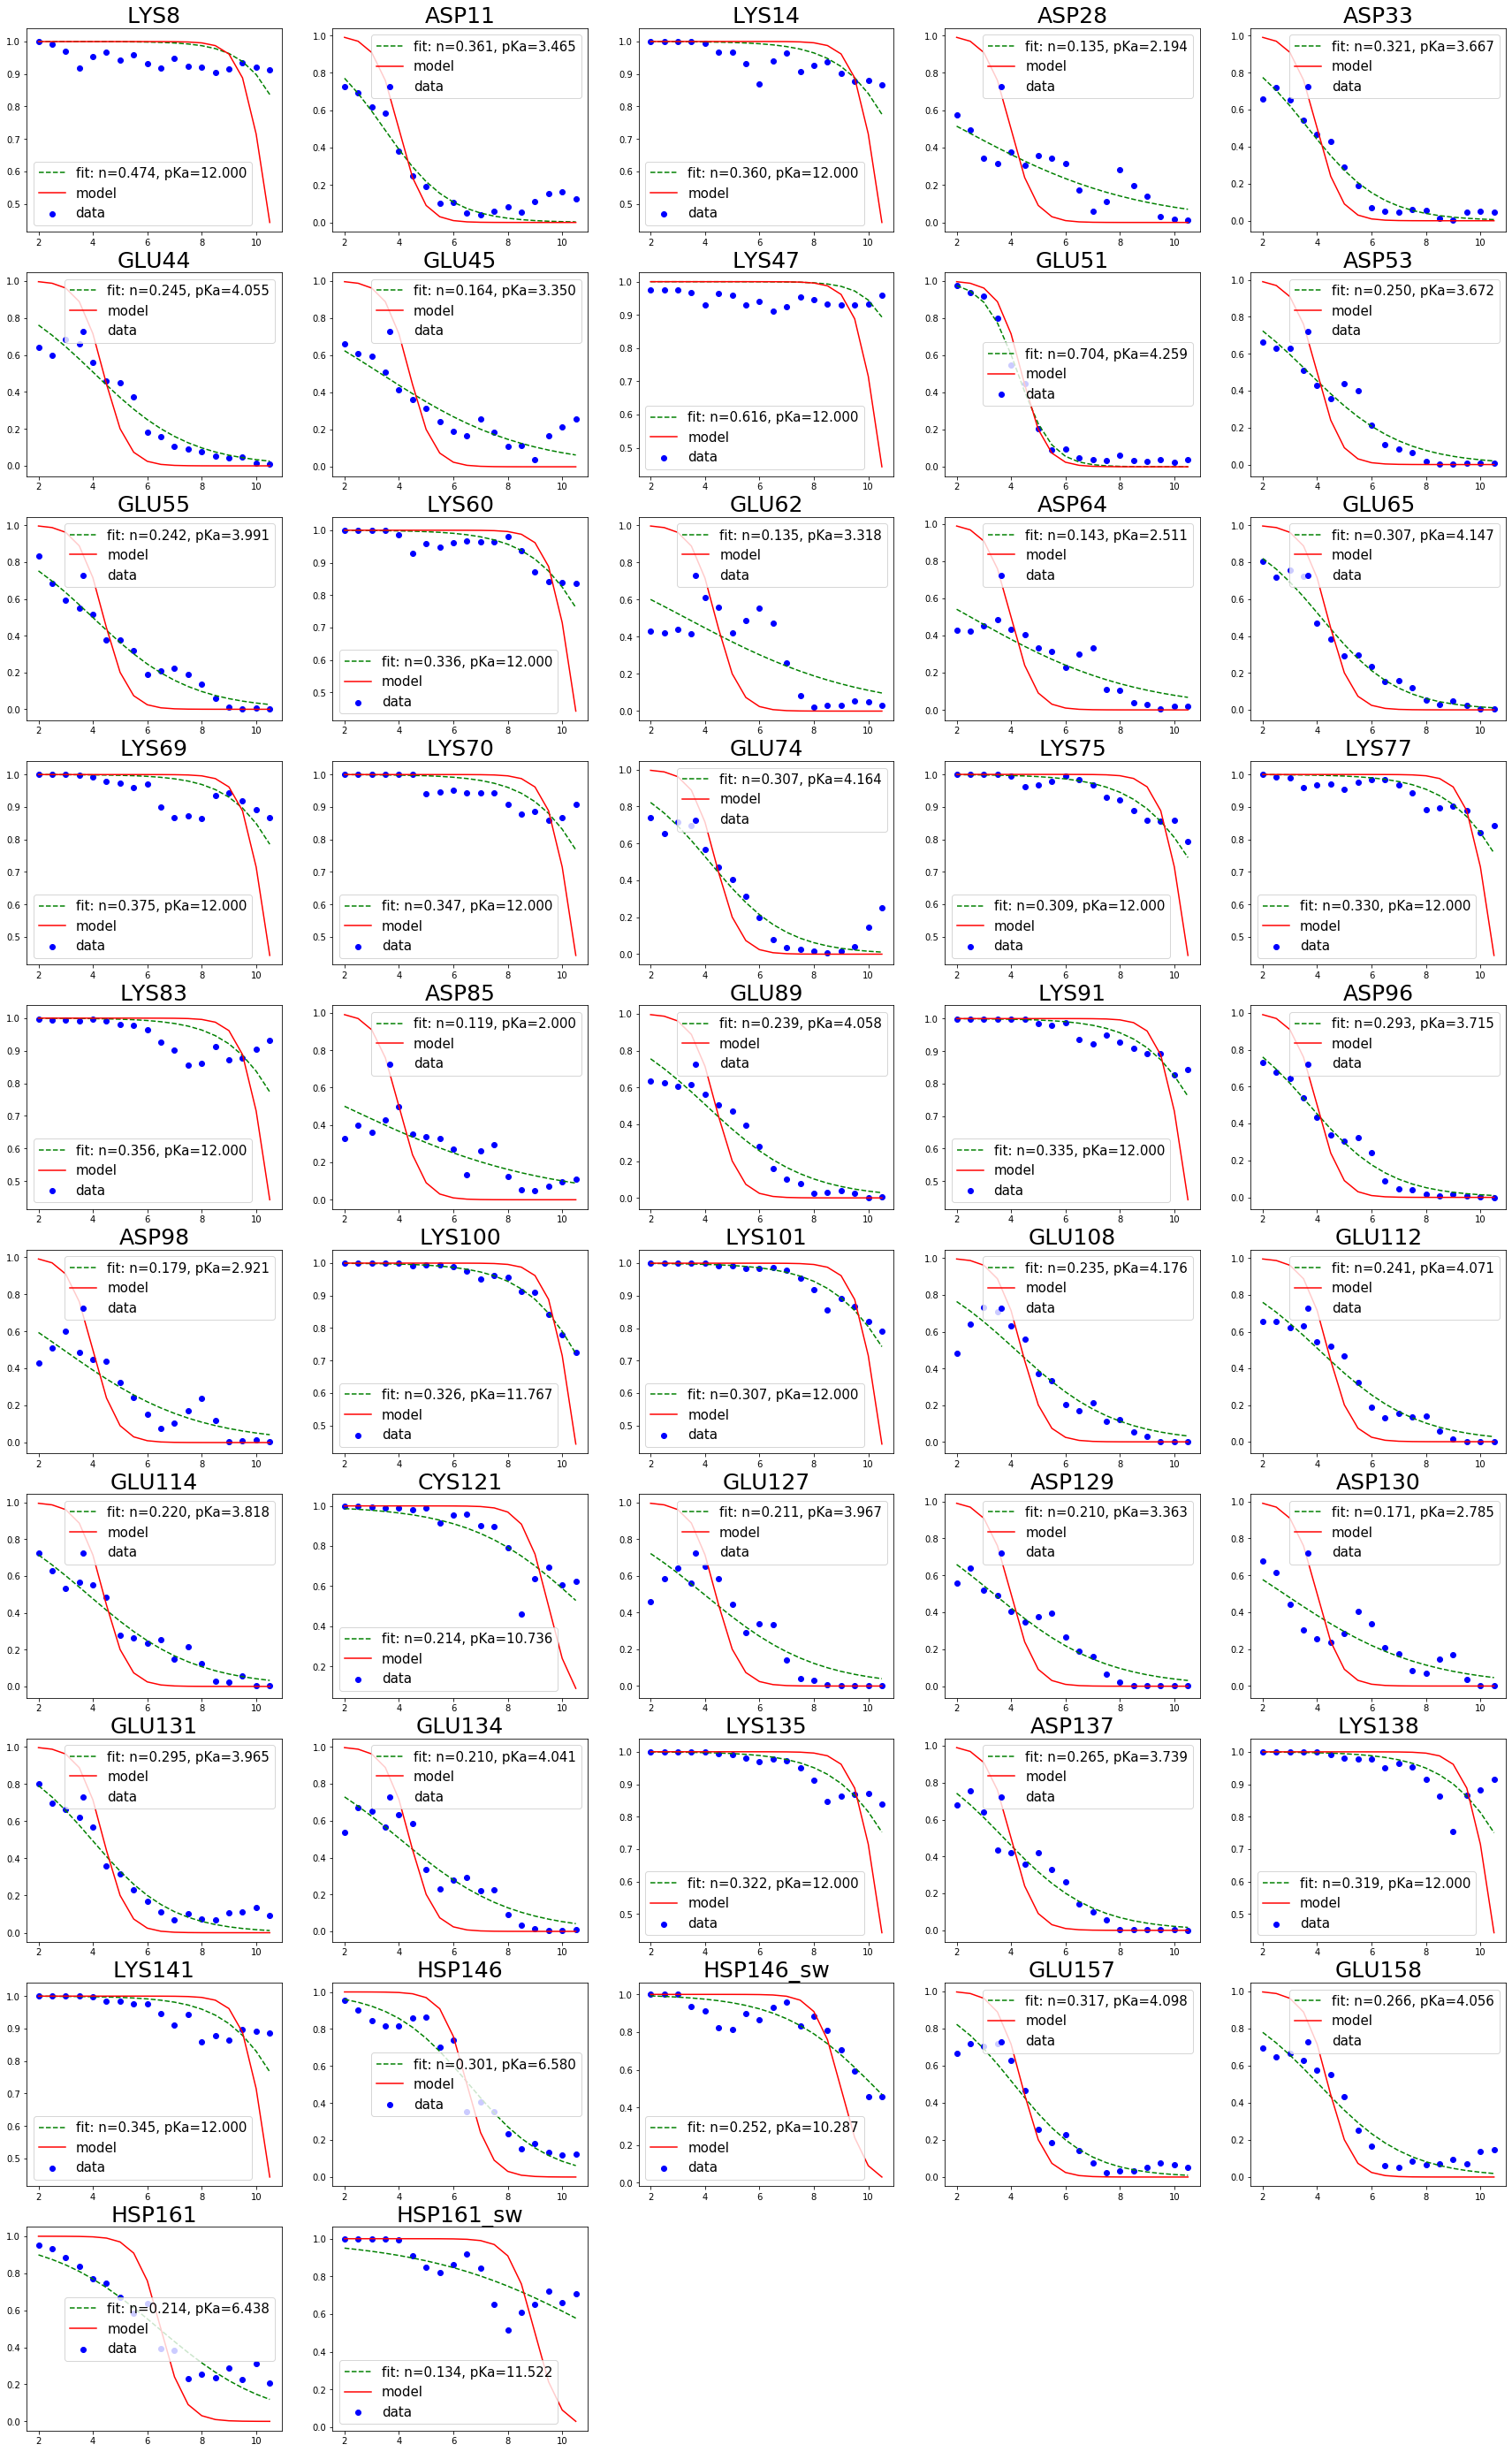

In [5]:
if len(occup) % 5 == 0:
    size = len(occup)//5
else:
    size = len(occup)//5+1
fig, axs = plt.subplots(size, 5, figsize = (30, 50))
for key in occup:
    key_index = list(occup.keys()).index(key)
    row = key_index//5
    column = key_index % 5
    ydata = occup[key]
    axs[row, column].scatter(pH_list, ydata, c = 'blue', label = 'data')
    popt, pcov = curve_fit(hill_func, pH_list, ydata, bounds=([-1, 2], [1, 12]))
    axs[row, column].plot(pH_list, hill_func(pH_list, *popt), 'g--', label='fit: n=%5.3f, pKa=%5.3f' % tuple(popt))
    if 'LYS' in key:
        pKa_model = 10.4
    elif 'GLU' in key:
        pKa_model = 4.4
    elif 'ASP' in key:
        pKa_model = 4.0
    elif '_sw' in key:
        pKa_model = 9.0
    elif 'HSP' in key:
        pKa_model = 6.5
    elif 'CYS' in key:
        pKa_model = 9.5

    ydata_m = hill_func(pH_list, 1, pKa_model)
    for item in ([axs[row, column].title, axs[row, column].xaxis.label, axs[row, column].yaxis.label]):
        item.set_fontsize(25)
    for item in (axs[row, column].get_xticklabels() + axs[row, column].get_yticklabels()):
        item.set_fontsize(10)
    axs[row, column].plot(pH_list, ydata_m, 'r-', label='model')
    axs[row, column].legend(fontsize = 15)
    axs[row, column].title.set_text(key)
if key_index % 5 !=0:
    n_empty = size*5 - len(occup)
    for n in range(n_empty):
        key_index+=1
        row = key_index//5
        column = key_index % 5
        fig.delaxes(axs[row, column])
fig.savefig('fname.png', facecolor='w', edgecolor='w',orientation='portrait')
